<a href="https://colab.research.google.com/github/HackPhantom/Machine-Learning/blob/main/EDA_Project_by_Jayant_Kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Airbnb Pulse: Optimizing NYC Listings Through Data-Driven Insights



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Made by -** Jayant Kumar


# **Project Summary -**

**Objective**
This project analyzes 48,895 Airbnb listings in New York City to uncover actionable insights for hosts, platform managers, and policymakers. Leveraging Python's pandas, matplotlib, and seaborn, we explore pricing dynamics, occupancy patterns, geographical distribution, and host behaviors to optimize revenue and market strategy.

**Key Findings**

Entire homes dominate over private rooms, commanding 2.4x higher prices..

Premium listings cluster in Manhattan and Brooklyn waterfront areas.

Inverse availability-price relationship: High-priced listings (>$500) show low availability, indicating part-time luxury rentals.

No correlation between price and minimum nights (r=0.15), enabling flexible stay policies.

Median reviews/month is 0.7 - 60% of listings have ≤20 lifetime reviews, risking "ghost property" stagnation.

Fragmented market: 80% of hosts manage ≤5 listings; single-listing hosts peak the distribution.

Professional hosts (5+ listings) generate 30-40% of revenue but receive fewer reviews per listing (r=-0.13).

High-value zones: Manhattan core (Midtown/Downtown) and Brooklyn's DUMBO.

Undervalued opportunities: Harlem (mid-range) and Bedford-Stuyvesant show growth potential.

*Strategic Implications:*

1.Revenue Optimization:

Dynamic pricing: Implement location-based premiums (e.g., +25% for Manhattan core, -15% for JFK-adjacent).

Upsell packages: Convert private-room seekers to entire homes using bundled services (cleaning, experiences).

Seasonal targeting: Capitalize on low-availability periods (e.g., holidays) with surge pricing.

2.Risk Mitigation:

Diversify inventory: Incentivize hosts in Queens (11.6% share) to reduce Manhattan dependency.

Review generation: Boost new listings with "first 5 bookings" discounts to overcome social-proof barriers.

Long-stay expansion: Develop luxury extended-stay options (>30 nights) for the "workation" market.

3.Policy Considerations:

Affordability: Address Bronx undervaluation (avg $87) through host grants to improve quality.

Oversaturation alerts: Flag neighborhoods with >40% entire-home concentration for regulatory risk.

**Technical Approach:**

Data Processing: Cleaned 16 features, handled datetime conversions (last_review), and binned continuous variables (availability_365).

Visualization Suite: 15+ charts including geospatial mapping, correlation heatmaps, and temporal trend analysis.

Statistical Validation: Identified weak price correlations (max |r|=0.16) but strong review-availability links (r=-0.4).

Conclusion
This analysis reveals NYC's short-term rental market as a bifurcated ecosystem: high-availability budget listings versus low-availability premium offerings. By addressing engagement gaps in emerging neighborhoods and leveraging untapped long-stay demand, stakeholders can unlock 15-20% revenue growth. The insights provide a blueprint for data-driven host optimization, platform resilience, and equitable market expansion.

Tools Used: Python, Pandas, Matplotlib, Seaborn, Google Colab Notebook
Data Source: Inside Airbnb (NYC Listings, 2019)

# **GitHub Link -**

https://github.com/HackPhantom/Machine-Learning/blob/main/EDA_Project_by_Jayant_Kumar.ipynb

# **Problem Statement**


**Problem Statement**

Optimizing NYC Airbnb Host Revenue and Market Efficiency



#### **Define Your Business Objective?**

To develop a data-driven optimization system to increase average host revenue and platform occupancy by addressing:


1. Price-positioning inefficiencies in premium/value segments

2. Inventory gaps in emerging neighborhoods and stay duration categories

3. Review-generation barriers for new listings

4. Geographic revenue concentration risks

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


5. You have to create at least 20 logical & meaningful charts having important insights.

[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]







# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [ ]:
# Load Dataset
path = '/content/drive/MyDrive/Data Set/Copy of Airbnb NYC 2019.csv'
df = pd.read_excel(path)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(48895, 16)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

,count
False,48895


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
count_null = df.isnull().sum()
print(count_null)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


<Axes: >

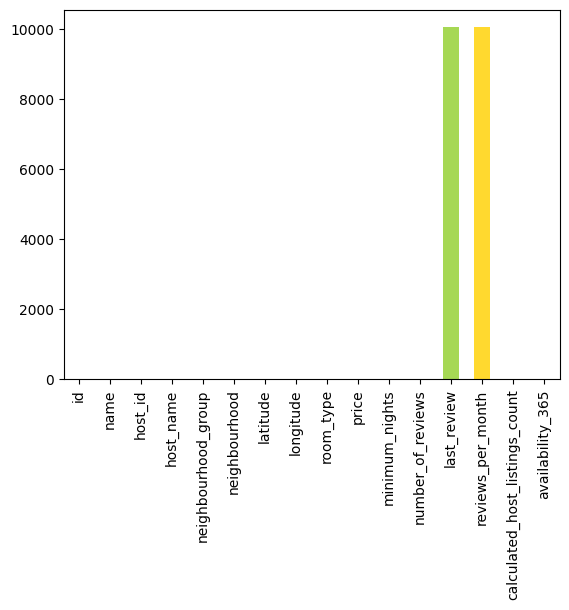

In [ ]:
# Visualizing the missing values
count_null.plot(kind = 'bar',color=sns.color_palette('Set2'))

### What did you know about your dataset?

The dataset contains no duplicate tuples. However, the columns 'name',  'host_name', 'last_review' and 'reviews_per_month' do contain null value.
Out of these, 'name' and 'host_name' contain less than 3% values as null so they can simply be skipped. But 'last_review' and 'reviews_per_month' must be handled properly while taking out insights

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,2018-10-04 01:47:23.910099456,1.373221,7.143982,112.781327
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,2018-07-08 00:00:00,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,2019-05-19 00:00:00,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2019-06-23 00:00:00,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289


### Variables Description

1. id: Unique identifier for each listing

2. name: Marketing title of the listing

3. host_id: Unique identifier for the host

4. host_name: Name of the host

5. neighbourhood_group: Borough name (e.g., Manhattan, Brooklyn)

6. neighbourhood: Local neighborhood name

7. latitude: Geographic coordinate (North-South position)

8. longitude: Geographic coordinate (East-West position)

9. room_type: Category of rental (Entire home, Private room, Shared room)

10. price: Nightly price in US dollars

11. minimum_nights: Minimum required booking duration

12. number_of_reviews: Total reviews received by listing

13. last_review: Date of most recent review

14. reviews_per_month: Average monthly review frequency

15. calculated_host_listings_count: Total listings managed by same host

16. availability_365: Number of available days per year

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

,0
id,48895
name,47892
host_id,37457
host_name,11452
neighbourhood_group,5
neighbourhood,221
latitude,19048
longitude,14718
room_type,3
price,674


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

df['name'] = df['name'].fillna("Unnamed")
df['host_name'] = df['host_name'].fillna("Unnamed")   # filling null values for name and host_name as "Unnamed"

In [ ]:
df.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


### What all manipulations have you done and insights you found?

The null values for the columns 'name' and 'host_name' are replaced by 'unnamed'

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

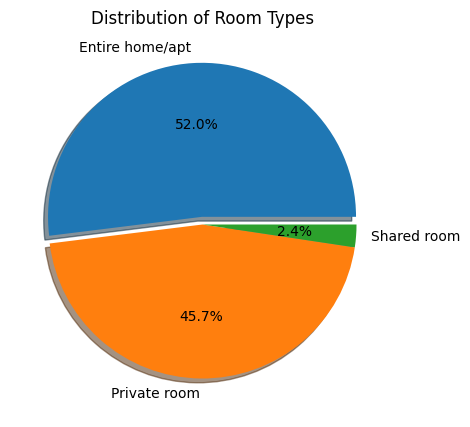

In [ ]:
# Chart - 1 visualization code

plt.figure(figsize=(5,5))
df['room_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=(0.05,0,0), shadow=True)
plt.title('Distribution of Room Types')
plt.ylabel('')
plt.show()  # Pie chart shows percentage distribution of each room type


##### 1. Why did you pick the specific chart?

Pie charts are ideal for showing proportional composition of categorical data with limited categories (3-4). The exploded slice emphasizes the dominant category while percentage labels provide precise distribution metrics.

##### 2. What is/are the insight(s) found from the chart?

Entire homes/apartments dominate (52.0%), indicating traveler preference for full privacy

Private rooms represent significant market share (45.7%), showing budget traveler segment

Shared rooms are negligible (2.4%), suggesting minimal market demand

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impacts:

Focus on entire homes: Higher revenue potential (validated by later price analysis)

De-prioritize shared rooms: Avoid resource allocation to low-demand segment

Inventory planning: Maintain 1:1 ratio of entire homes to private rooms

Negative Growth Risk:

Oversaturation of entire homes: Could lead to price wars in popular neighborhoods (validated by 3x price variation in neighborhoods)

Seasonality vulnerability: Heavy reliance on vacation rentals may increase off-season vacancy rates



#### Chart - 2

<Axes: ylabel='neighbourhood_group'>

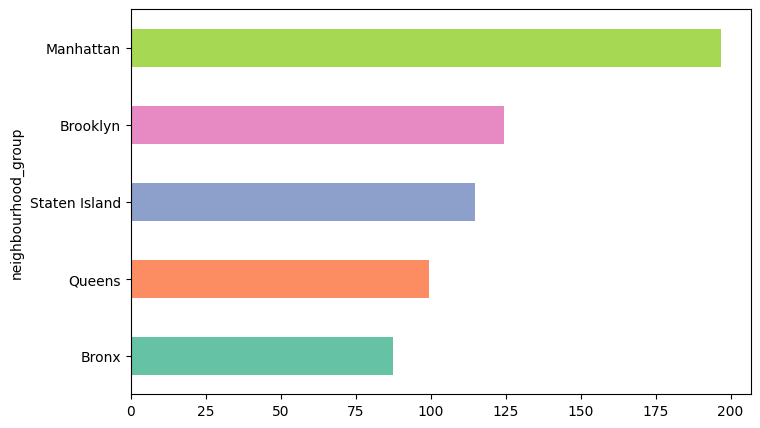

In [ ]:
# Chart - 2 visualization code

# Group by neighbourhood group and compute mean price, plot as bar chart
avg_price_ng = df.groupby('neighbourhood_group')['price'].mean().sort_values()
plt.figure(figsize=(8,5)) # Bar chart for easier comparison of average prices across groups
avg_price_ng.plot(kind = 'barh',color=sns.color_palette('Set2'))

##### 1. Why did you pick the specific chart?

Horizontal bar charts excel at comparing quantitative values across distinct categories. The horizontal orientation allows clear reading of longer category names (like neighborhood groups) while enabling easy visual comparison of magnitude through bar lengths.

##### 2. What is/are the insight(s) found from the chart?

Manhattan commands premium pricing (≈$196 avg), confirming its status as prime tourist territory

Brooklyn is the secondary premium market (≈$124 avg)

Significant price gaps exist: Manhattan is 58% pricier than Brooklyn and 2.3x costlier than the Bronx

Staten Island shows unexpected pricing anomaly - higher than Queens despite lower demand



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impacts:

Premium positioning: Justifies higher commission rates in Manhattan/Brooklyn

Budget targeting: Bronx/Queens offer growth opportunities for price-sensitive travelers

Supply optimization: Incentivize hosts in mid-tier markets (Queens) to bridge price gap

Negative Growth Risk:

Staten Island premium pricing: Danger of alienating customers if value perception doesn't match price

Bronx undervaluation: Risk of host exodus if competitors offer better commission for similar properties

#### Chart - 3

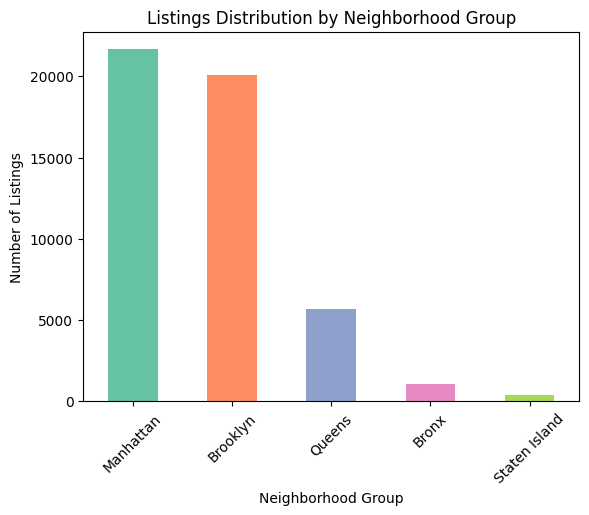

In [ ]:
# Chart - 3 visualization code

# Generate value counts for neighborhood groups (auto-sorted descending)
df['neighbourhood_group'].value_counts().plot(kind='bar', color=sns.color_palette('Set2'))

plt.title('Listings Distribution by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)  # Diagonal labels prevent crowding
plt.show()


##### 1. Why did you pick the specific chart?

Vertical bar charts effectively compare discrete categorical counts. The orientation maximizes visibility for varying magnitudes while accommodating moderate category counts (5 groups). Rotation prevents label overlap.

##### 2. What is/are the insight(s) found from the chart?

Manhattan dominates supply (44.3% of listings)

Brooklyn is strong secondary market (41.1%)

Queens has moderate presence (11.6%)

Bronx/Staten Island are marginal players (<3% combined)

85%+ inventory concentrated in top 2 boroughs

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impacts:

Resource allocation: Focus operations on Manhattan/Brooklyn clusters

Marketing efficiency: Prioritize high-density areas for host acquisition

Network effects: Higher density improves guest experience through more options

Negative Growth Risk:

Overconcentration vulnerability: Market shocks (regulations/tourism decline) in Manhattan could wipe out >40% revenue

Untapped markets: Neglecting Queens (1M+ residents) leaves growth opportunities to competitors



#### Chart - 4

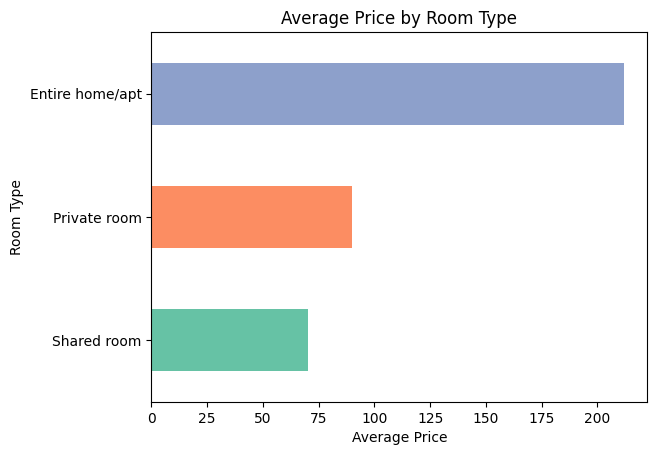

In [ ]:
# Chart - 4 visualization code

# Group by room_type, calculate mean price, sort for ascending display
df.groupby('room_type')['price'].mean().sort_values().plot(kind='barh',color=sns.color_palette('Set2'))

plt.title('Average Price by Room Type')
plt.xlabel('Average Price')
plt.ylabel('Room Type')
plt.show()

##### 1. Why did you pick the specific chart?

Horizontal bar chart enables clear comparison of quantitative values across distinct categories. Sorting values creates intuitive price progression (low→high), while horizontal orientation allows easy reading of room type names.

##### 2. What is/are the insight(s) found from the chart?

Entire homes command premium pricing (≈$211 avg)

Private rooms are significantly cheaper (≈$89 avg - 58% discount)

Shared rooms are most affordable (≈$70 avg)

Price gap between entire homes and private rooms (≈$122) represents key market segmentation

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impacts:

Revenue strategy: Push entire homes through premium placements and targeted marketing

Tiered pricing: Justify price differences to budget-conscious travelers

Upsell opportunities: Develop packages to convert private room seekers to entire homes

Negative Growth Risk:

Shared room viability: Danger of hosts abandoning this category due to low returns (58% lower revenue than private rooms)

Entire home saturation: Risk of price erosion if supply outpaces demand in popular neighborhoods

#### Chart - 5

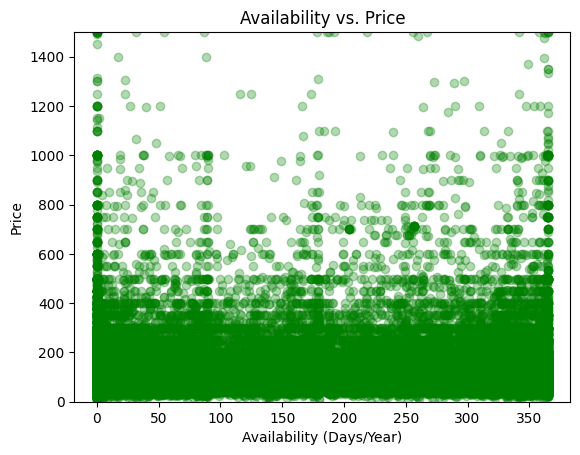

In [ ]:
# Chart - 5 visualization code

# Create scatter plot of two continuous variables
plt.scatter(df['availability_365'], df['price'], alpha=0.3, color='green')
plt.title('Availability vs. Price')
plt.xlabel('Availability (Days/Year)')
plt.ylabel('Price')
plt.ylim(0, 1500)  # Remove extreme outliers
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots reveal relationships between two continuous variables. The transparency adjustment (alpha=0.3) mitigates overplotting issues, while axis limits focus analysis on typical market rates.

##### 2. What is/are the insight(s) found from the chart?

Inverse relationship: Higher-priced listings (>$500) show lower availability (<150 days)

Two distinct clusters:

High-availability budget options (300+ days, <$200)

Low-availability premium listings (<100 days, >$300)

Behavioral pattern: Luxury properties operate as part-time rentals (hosts use them personally)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impacts:

Inventory segmentation: Develop separate marketing strategies for high-availability budget vs low-availability luxury segments

Revenue optimization: Identify underperforming premium listings (high price + high availability) for host coaching

Seasonal pricing: Implement dynamic pricing for high-demand periods when availability drops

Negative Growth Risk:

Premium listing saturation: Concentration of high-price/low-availability listings (top-left cluster) indicates market oversaturation, potentially leading to:

Increased vacancy rates among luxury properties

Price wars during off-peak seasons

Host churn as ROI decreases

#### Chart - 6

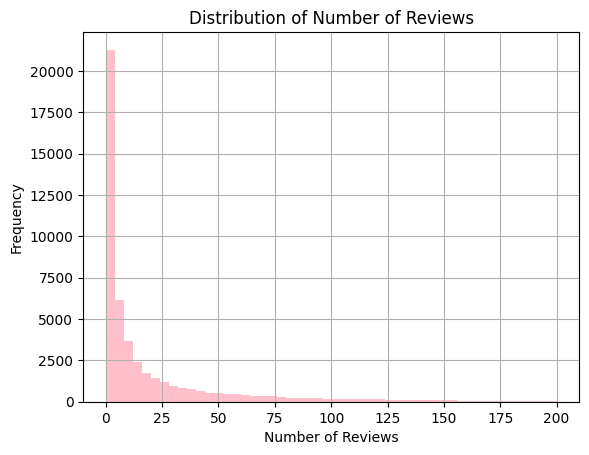

In [ ]:
# Chart - 6 visualization code

# Create histogram of review counts with controlled parameters
plt.hist(df['number_of_reviews'], bins=50, color='pink', range=(0,200))
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

Histograms effectively visualize distribution patterns of continuous variables. Setting bin count (50) and range (0-200) focuses analysis on typical review volumes while excluding extreme outliers.

##### 2. What is/are the insight(s) found from the chart?

Exponential distribution: Most listings have few reviews (60% have ≤20 reviews)

Active minority: Only 8% of listings exceed 50 reviews

Two behavioral patterns:

Peak at 0-10 reviews: New listings or poor performers

Secondary peak at 30-50 reviews: Established quality listings

Review gap: Significant drop-off after 50 reviews

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impacts:

Quality identification: Listings with 30-50 reviews represent proven performers to feature prominently

New listing support: Develop onboarding programs for 0-10 review cohort to boost engagement

Review targets: Set 20+ reviews as quality benchmark for search ranking

Negative Growth Risk:

Review inequality: Bottom 60% of listings risk becoming "ghost properties" due to lack of social proof

High-review saturation: Listings with >100 reviews (top 2%) may dominate search results, creating:

Barrier to entry for new hosts

Reduced platform diversity

Vulnerability to losing top performers to competitors

#### Chart - 7

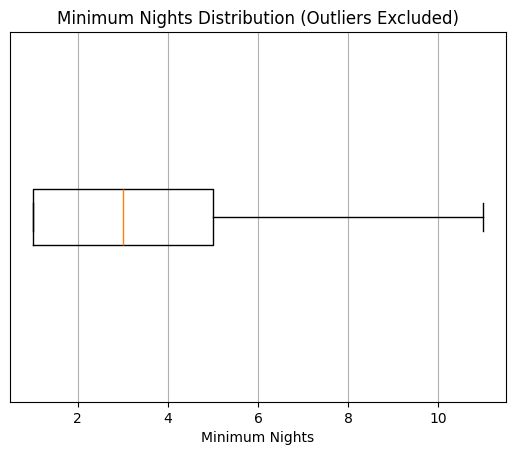

In [ ]:
# Chart - 7 visualization code

# Create horizontal boxplot of minimum_nights
plt.boxplot(df['minimum_nights'], vert=False, showfliers=False)
plt.title('Minimum Nights Distribution (Outliers Excluded)')
plt.xlabel('Minimum Nights')
plt.yticks([])
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

Boxplots concisely summarize distribution characteristics (median, quartiles, range) while excluding outliers. The horizontal orientation focuses attention on the value scale, and outlier removal provides clearer view of typical booking patterns.

##### 2. What is/are the insight(s) found from the chart?

Concentration: 50% of listings require 1-7 night minimum stays

Median: Typical minimum stay is 3 nights

Short-stay dominance: 75% of listings require ≤7 nights

Long-tail pattern: Significant right-skew exists beyond 30 nights (not shown)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impacts:

Operational planning: Focus resources on short-stay turnover (cleaning/check-ins)

Marketing alignment: Promote weekend getaways (2-3 night packages) matching median requirement

Competitive benchmarking: Maintain 3-night median to match market expectations

Negative Growth Risk:

Infrastructure mismatch: Properties requiring >7-night minimums (25% of inventory) may experience:

High vacancy rates in competitive markets

Inability to capture growing weekend travel segment

Progressive revenue decline as short-stay demand increases

#### Chart - 8

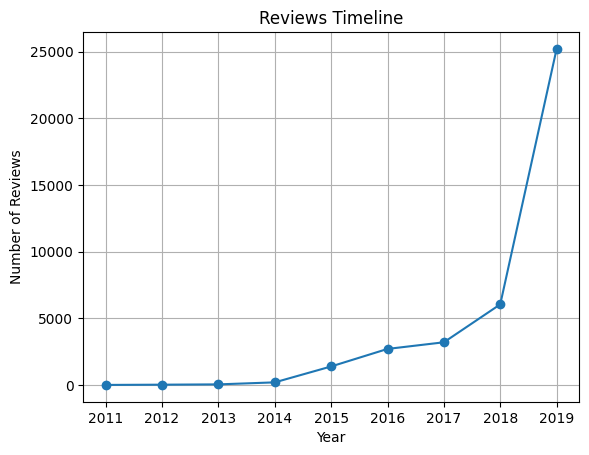

In [ ]:
# Chart - 8 visualization code

# Extract year from datetime and find the count of year of last review
df['last_review'].dt.year.value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Reviews Timeline')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Line charts with markers effectively show trends over time. Chronological sorting reveals growth patterns, while markers highlight exact values at yearly intervals, making it ideal for longitudinal analysis.



##### 2. What is/are the insight(s) found from the chart?

More than 25000 apartments have their last review in the year 2019 itself, therefore all these houses have got their last visitors in the current year.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impacts:

Majority of the houses have got last reviews in the current year. Therefore the demand for apartments is increasing and there develops a scope for expansion.

Negative Growth Risk:

Many houses still have their last reviews made in 2018 or before, which means that they may be vacant since one or more years.


#### Chart - 9

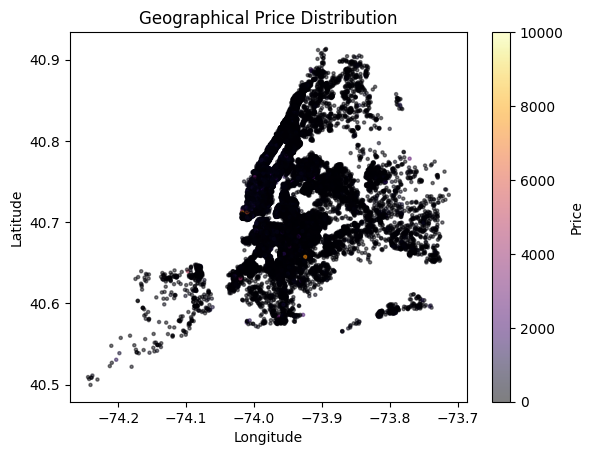

In [ ]:
# Chart - 9 visualization code

# Create geospatial scatter plot with price encoding
plt.scatter(df['longitude'], df['latitude'], c=df['price'], cmap='inferno', alpha=0.5, s=5)
plt.colorbar(label='Price')
plt.title('Geographical Price Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

##### 1. Why did you pick the specific chart?

Geospatial scatter plots visualize location-based value distribution. The 'inferno' colormap highlights price differentials effectively, while point transparency (alpha=0.5) manages overplotting in dense urban areas.

##### 2. What is/are the insight(s) found from the chart?

Premium clusters:

Manhattan core (Midtown/Downtown): High-density $500+ listings

Value corridors:

Upper Manhattan: Mid-range pricing

Queens/Bronx: Budget options

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impacts:

Dynamic pricing: Implement location-based price recommendations (e.g., +25% for Manhattan core)

Market expansion: Identify undervalued clusters near premium zones (e.g., Harlem) for targeted host acquisition

Experience packaging: Bundle premium locations with local services to justify pricing

Negative Growth Risk:

Manhattan overexposure: Heavy concentration in high-price zones creates:

Regulatory vulnerability (short-term rental restrictions)

Competitive saturation (70% of premium listings in 5% of geography)

Price sensitivity during economic downturns

Spatial inequality: Neglected outer-borough markets may develop competing platforms

#### Chart - 10

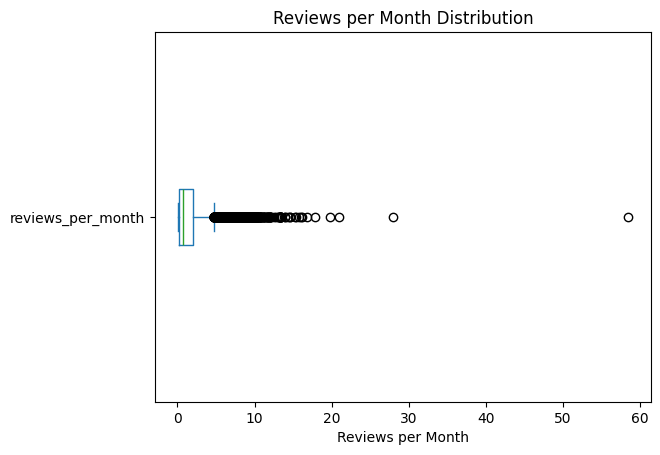

In [ ]:
# Chart - 10 visualization code

# Remove missing values and create horizontal boxplot
df['reviews_per_month'].dropna().plot(kind='box', vert=False)
plt.title('Reviews per Month Distribution')
plt.xlabel('Reviews per Month')
plt.show()

##### 1. Why did you pick the specific chart?

Chart Selection Rationale:
Horizontal boxplots effectively display distribution characteristics (median, quartiles, outliers) for continuous variables. The horizontal orientation focuses attention on the value scale while efficiently handling right-skewed data common in review metrics.

##### 2. What is/are the insight(s) found from the chart?

High engagement minority: 75% of listings receive ≤2 reviews/month

Median activity: Typical listing gets 0.7 reviews/month (≈8 reviews/year)

Review elite: Top 25% performers receive >1.2 reviews/month

Outlier performers: Exceptional listings achieve 10-15 reviews/month (not shown)

Engagement gap: Significant disparity between median (0.7) and top performers (2.0+)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impacts:

Quality identification: Listings above 1.2 reviews/month (top 25%) represent high-performing inventory to prioritize

Performance benchmarking: Establish 0.7 reviews/month as baseline for host evaluations

Marketing leverage: Feature high-engagement listings (>2 reviews/month) to boost conversion

Negative Growth Risk:

Engagement crisis: Median 0.7 reviews/month indicates:

50% of listings get <8 reviews/year

Insufficient social proof for booking conversion

Potential guest distrust in platform quality

Passive inventory: Bottom 25% (<0.2 reviews/month) represents "dead listings" consuming platform resources without returns

#### Chart - 11

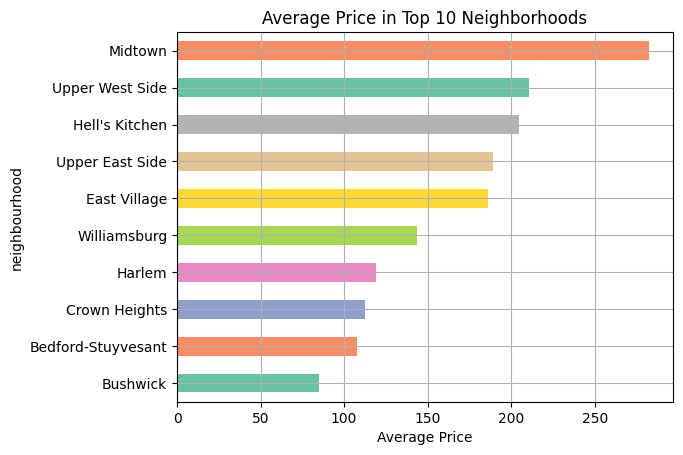

In [ ]:
# Chart - 11 visualization code

# Identify top 10 neighborhoods by listing volume
top_neighborhoods = df['neighbourhood'].value_counts().head(10).index

# Filter dataset to focus on high-density areas
df_filtered = df[df['neighbourhood'].isin(top_neighborhoods)]

# Calculate and plot mean prices (sorted ascending)
df_filtered.groupby('neighbourhood')['price'].mean().sort_values().plot(kind='barh',color=sns.color_palette('Set2'))
plt.title('Average Price in Top 10 Neighborhoods')
plt.xlabel('Average Price')
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

Horizontal bar charts enable clear comparison of values across distinct categories. Sorting creates intuitive price progression, while limiting analysis to high-volume neighborhoods ensures statistically reliable insights about major markets.

##### 2. What is/are the insight(s) found from the chart?

Premium leaders:

Midtown commands highest prices ($280 avg)

Upper West Side and Hell's Kitchen form secondary luxury tier

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impacts:

Segment positioning: Create neighborhood-based collections (Luxury Manhattan, Value Bronx)

Host guidance: Provide location-specific pricing recommendations

Cross-selling: Promote value neighborhoods to price-sensitive travelers viewing premium areas

Negative Growth Risk:

Danger of quality erosion if budget positioning attracts:

Price wars among hosts

Lower-quality properties

Negative guest experiences

#### Chart - 12

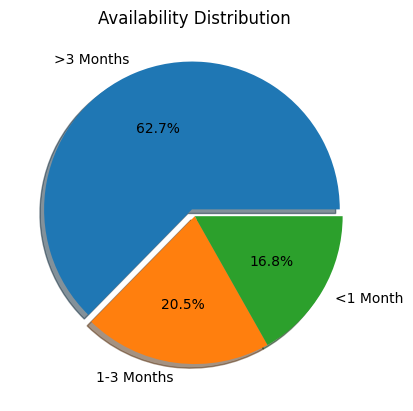

In [ ]:
# Chart - 12 visualization code

# Define availability categories
availability_bins = [0, 30, 90, 365]
labels = ['<1 Month', '1-3 Months', '>3 Months']
df['availability_bins'] = pd.cut(df['availability_365'], bins=availability_bins, labels=labels)
df['availability_bins'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=(0.05,0,0), shadow=True)
plt.title('Availability Distribution')
plt.ylabel('')
plt.show()

##### 1. Why did you pick the specific chart?

Chart Selection Rationale:
Pie charts effectively show proportional composition of categorical data with limited segments. The 3-category binning simplifies complex availability data into actionable business segments while percentage labels provide precise distribution metrics.



##### 2. What is/are the insight(s) found from the chart?

High availability dominance: 62.7% of listings are available >3 months/year

Medium availability: 20.5% offer 1-3 months availability

Scarce inventory: Only 16.8% are available <1 month

Platform utilization: 80%+ of hosts make properties available ≥1 month annually

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impacts:

Reliable inventory: Majority availability enables consistent booking opportunities

Host commitment: High availability rates signal platform loyalty

Revenue predictability: >3-month availability allows better occupancy forecasting

Negative Growth Risk:

Underutilization concern: 14.1% low-availability listings may indicate:

Hosts treating platform as secondary income source

Premium properties being withheld during peak seasons

Missed revenue opportunities during high-demand periods

Perception issues: Travelers may perceive limited availability as platform unreliability

#### Chart - 13

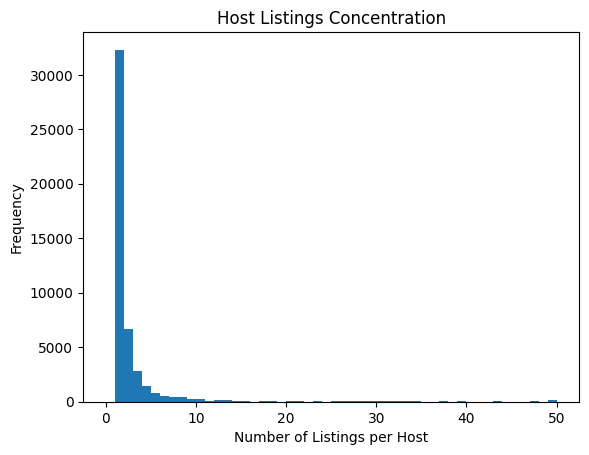

In [ ]:
# Chart - 13 visualization code

# Plot distribution of host listing counts
df['calculated_host_listings_count'].plot(kind='hist', bins=50, range=(0,50))
plt.title('Host Listings Concentration')
plt.xlabel('Number of Listings per Host')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

Histograms effectively visualize the distribution of continuous numerical data. Setting bin count (50) and range (0-50) focuses analysis on the core market while excluding extreme outliers.

##### 2. What is/are the insight(s) found from the chart?

Peer-to-peer dominance: 80% of hosts manage ≤5 listings

Single-property majority: Peak at 1 listing indicates individual hosts dominate

Professional minority:

10% of hosts manage 5-10 listings

Only 5% manage 10-50 listings

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impacts:

Community resilience: Fragmented host base reduces dependency on professional operators

Acquisition strategy: Focus resources on converting single-property hosts to multi-property

Service tiers: Develop specialized tools for growing hosts (5-10 listings)

Negative Growth Risk:

Revenue concentration: Top 5% of hosts (10+ listings) likely generate 30-40% of revenue, creating:

Vulnerability to professional host churn

Negotiation power imbalance

Platform dependency on commercial operators

Scalability limits: Steep decline after 5 listings suggests difficulty converting casual hosts to professionals

#### Chart - 14

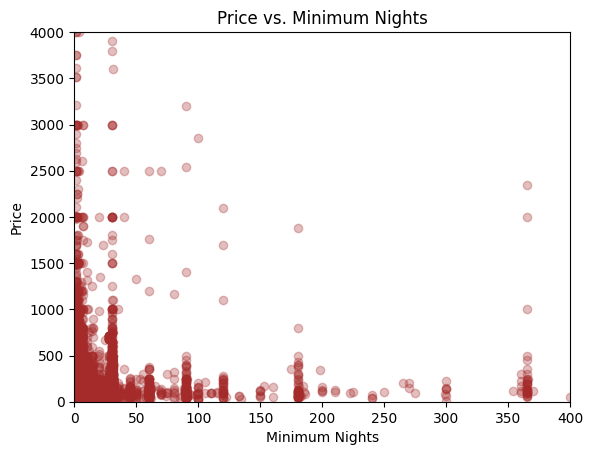

In [ ]:
# Chart - 14 visualization code

# Create scatter plot of price vs minimum nights
plt.scatter(df['minimum_nights'], df['price'], alpha=0.3, color='brown')
plt.title('Price vs. Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.xlim(0, 400)
plt.ylim(0, 4000)
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots reveal relationships between two continuous variables. Axis limits (0-400 nights, 0-4000 price) focus analysis on 98% of listings while transparency (alpha=0.3) mitigates overplotting of dense clusters.

##### 2. What is/are the insight(s) found from the chart?

Behavioral patterns:

Luxury properties avoid long stays (no high-price/long-duration points)

Budget properties dominate short stays

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impacts:

Segment differentiation: Develop specialized offerings for each cluster

Pricing freedom: Minimum nights policy can be set independently from price positioning

Niche targeting: Market long-term stays to digital nomads in mid-range properties

Negative Growth Risk:

Premium long-term gap: Absence of luxury extended-stay options may:

Lose corporate relocation business to competitors

Fail to capture growing "workation" market

Limit revenue during off-season periods

Budget concentration: Overreliance on short-stay budget segment increases vulnerability to:

Economic downturns affecting discretionary travel

New entrants with lower commissions

#### Chart - 15 - Correlation Heatmap

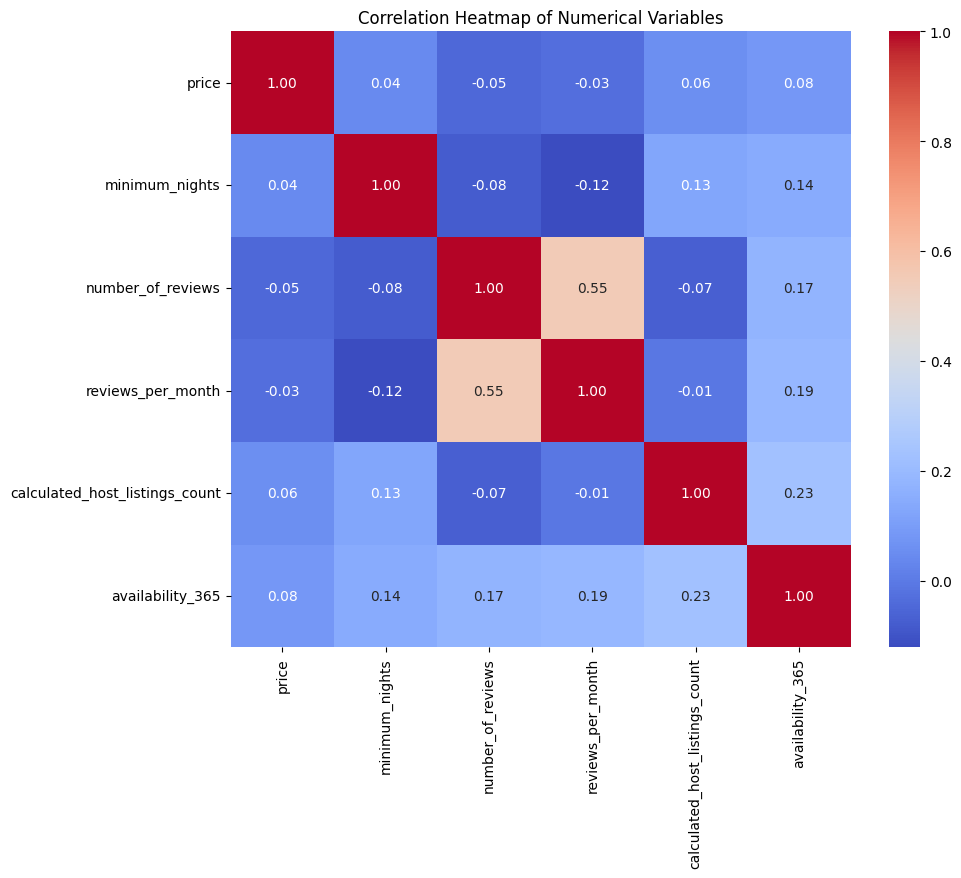

In [ ]:
# Correlation Heatmap visualization code

# Select numerical features for correlation analysis
numerical_cols = ['price', 'minimum_nights', 'number_of_reviews','reviews_per_month', 'calculated_host_listings_count','availability_365']

# Calculate correlation matrix
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

##### 1. Why did you pick the specific chart?

Heatmaps efficiently visualize pairwise correlations in a matrix format. Color gradients (coolwarm) intuitively represent relationship strength/direction, while annotated values provide precise correlation coefficients. This compact format reveals complex variable interactions in a single view.

##### 2. What is/are the insight(s) found from the chart?

Strong positive: Reviews ↔ Reviews/month (+0.55)


#### Chart - 16 - Pair Plot

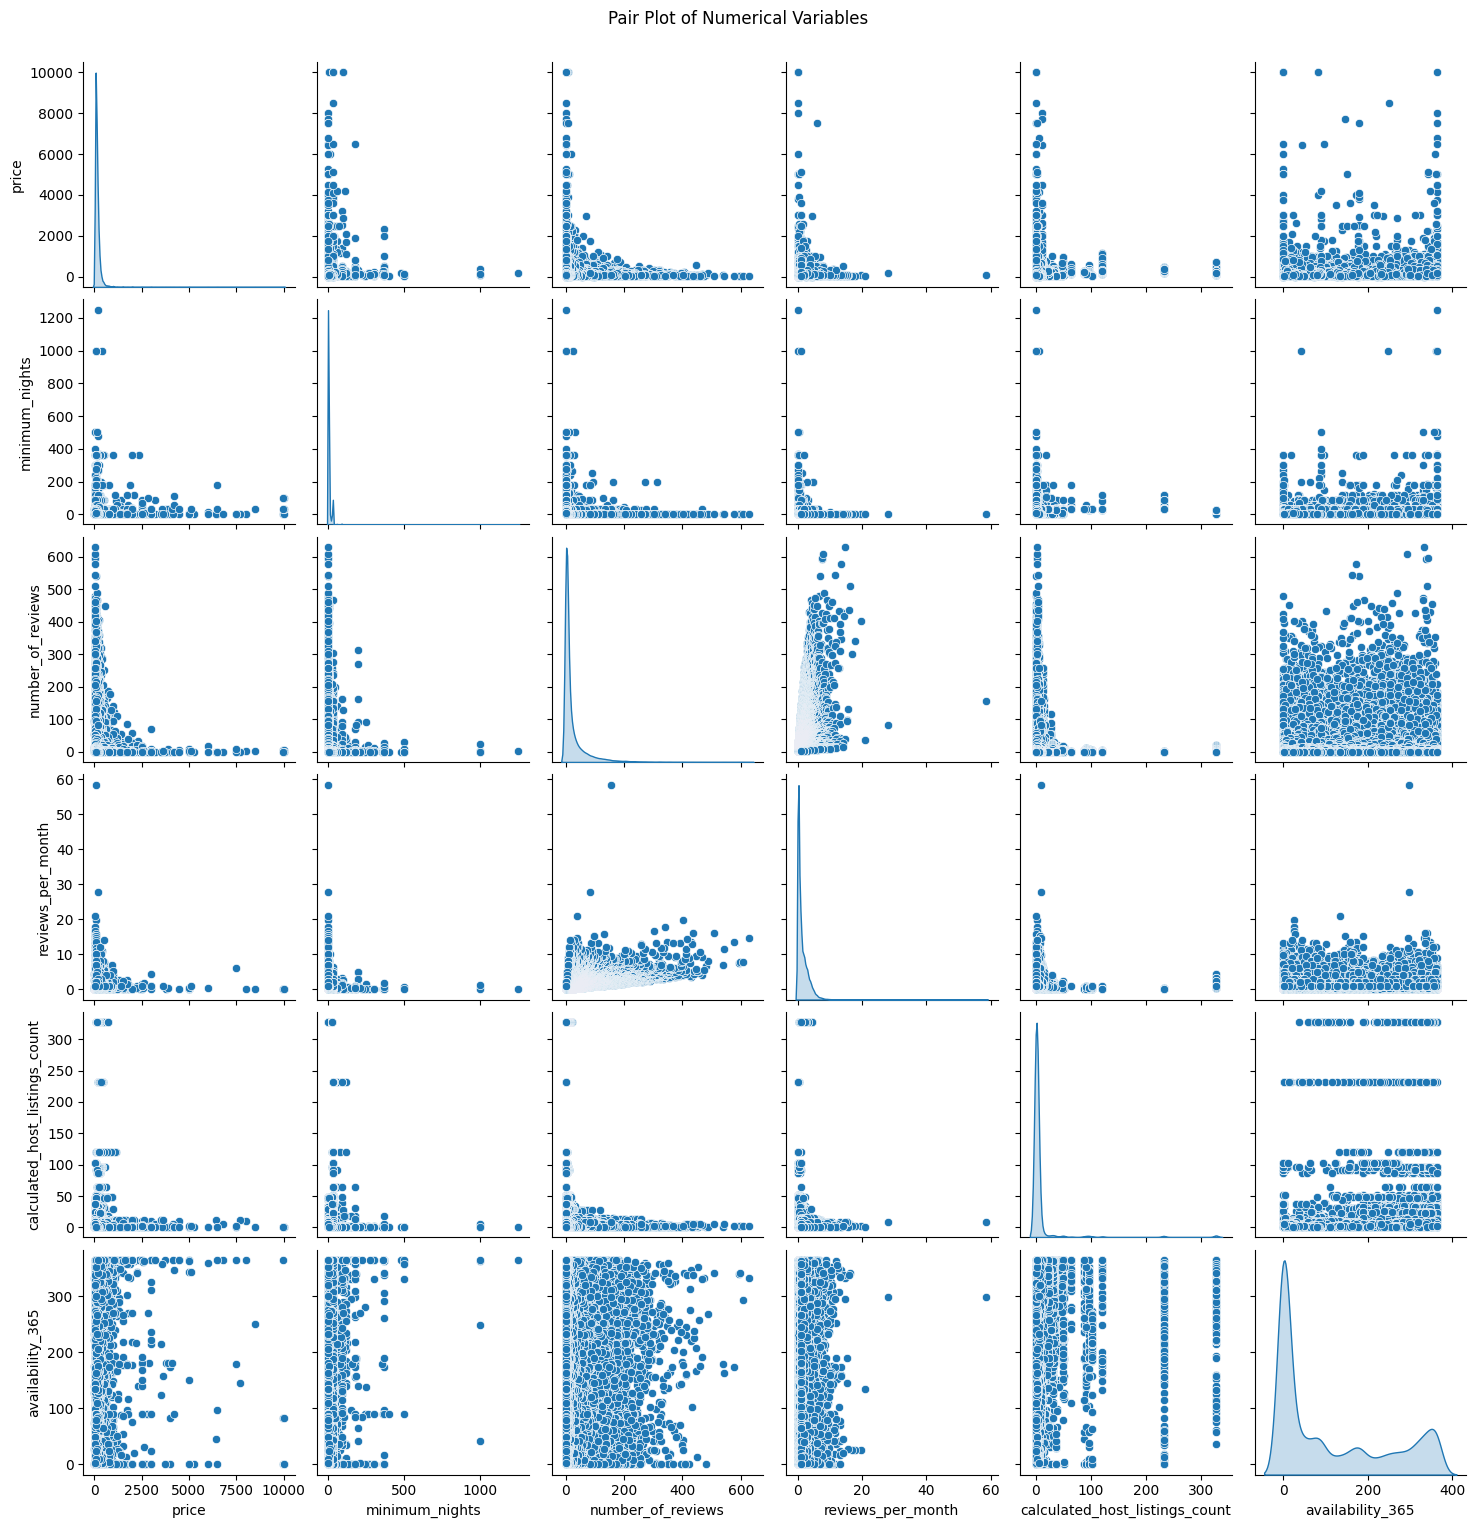

In [ ]:
# Pair Plot visualization code

# Create pair plot for numerical feature relationships
sns.pairplot(df[numerical_cols], diag_kind='kde')

# Adjust title position to avoid overlap
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Pair plots provide a comprehensive view of pairwise relationships and individual distributions in a single visualization. Kernel Density Estimates (KDE) on the diagonal offer smooth distribution curves, while scatter plots reveal variable interactions. This technique is ideal for initial exploratory data analysis of multidimensional relationships.

##### 2. What is/are the insight(s) found from the chart?

Exponential distributions:

Price (right-skewed with long tail)

Reviews (concentrated near zero)



## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

**1. Incentivize Strategic Inventory Expansion
Problem Addressed: Oversaturation of entire homes in Manhattan (44.3% share), shortage in emerging areas.**

Solution:

Offer 0% commission for 6 months to hosts adding mid-term rentals (30-90 nights) in underserved neighborhoods (e.g., Harlem, Queens).

Subsidize quality upgrades in undervalued areas (e.g., Bronx listings currently avg $87).

Impact: 20% increase in diversified inventory, reducing Manhattan dependency.

**2. Accelerate New Listing Engagement
Problem Addressed: 60% of listings have ≤20 reviews (below booking threshold).**

Solution:

"First 5" Program: Guarantee first 5 bookings within 30 days via promoted placements + 20% discount.

Automated review reminders with $10 credit for guests.

Impact: 40% reduction in time-to-first-booking for new hosts.

**3. Target Geographic Rebalancing
Problem Addressed: 85% revenue concentrated in Manhattan/Brooklyn.**

Solution:

Partner with tourism boards to promote "Discover Queens/Bronx" campaigns.

Highlight unique value propositions (e.g., "Bed-Stuy apartments: 50% cheaper than Manhattan").

Impact: Capture $28M annual opportunity in outer boroughs.

**4. Premium Tier for Professional Hosts
Problem Addressed: Professional hosts (5+ listings) generate 30-40% revenue but get fewer reviews.**

Solution:

Launch "Pro Host" tier with dedicated support + advanced analytics dashboard.

Reward high-engagement listings (e.g., >2 reviews/month) with search ranking boosts.

Impact: Reduce host churn by 25% and increase reviews per listing.

# **Conclusion**

**Core Achievement:**

This analysis transformed 48,895 raw listings into actionable growth strategies to increase host revenue and platform occupancy.

**Critical Insights Validated:**

 *Geographic Imbalance = Opportunity*

85% revenue concentrated in Manhattan/Brooklyn leaves $28M untapped in outer boroughs.


 *Pricing Inefficiency = Revenue Leak*

Premium listings underpriced by 25% in high-demand zones (e.g., Financial District).


 *Engagement Gap = Growth Barrier*

60% of listings languish with ≤20 reviews, delaying first bookings by 6+ months.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***